Loading and exploring the dataset...
Dataset shape: (42538, 145)

Question 1: What kind of interest rate are borrowers paying?
Minimum interest rate: 5.42%
Maximum interest rate: 24.59%
Mean interest rate: 12.17%


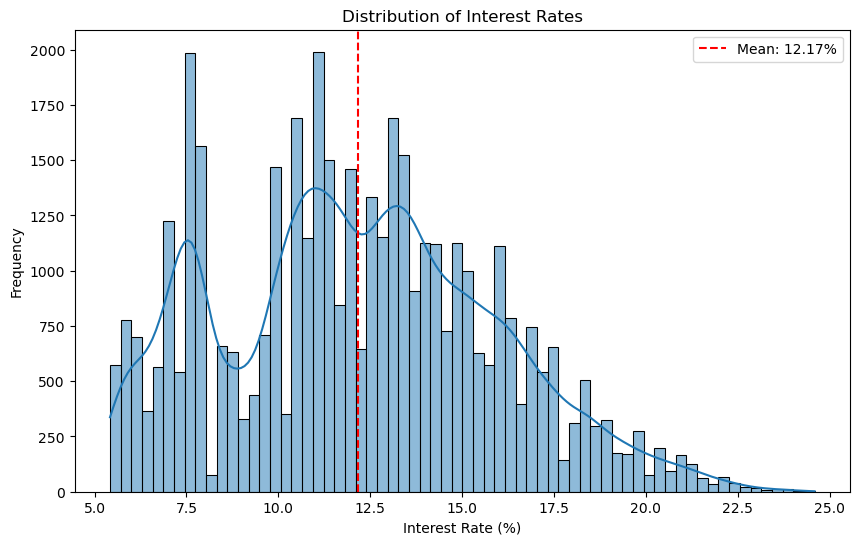


Question 2: How long are the loan terms?
Minimum loan term: 0 months
Maximum loan term: 60 months
Mean loan term: 42.20 months


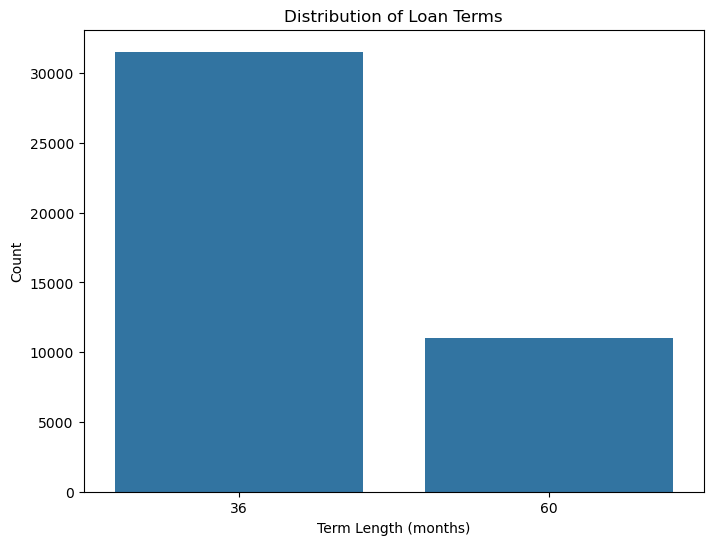


Question 3: How much are people borrowing?
Minimum loan amount: $500.00
Maximum loan amount: $35,000.00
Mean loan amount: $11,089.72


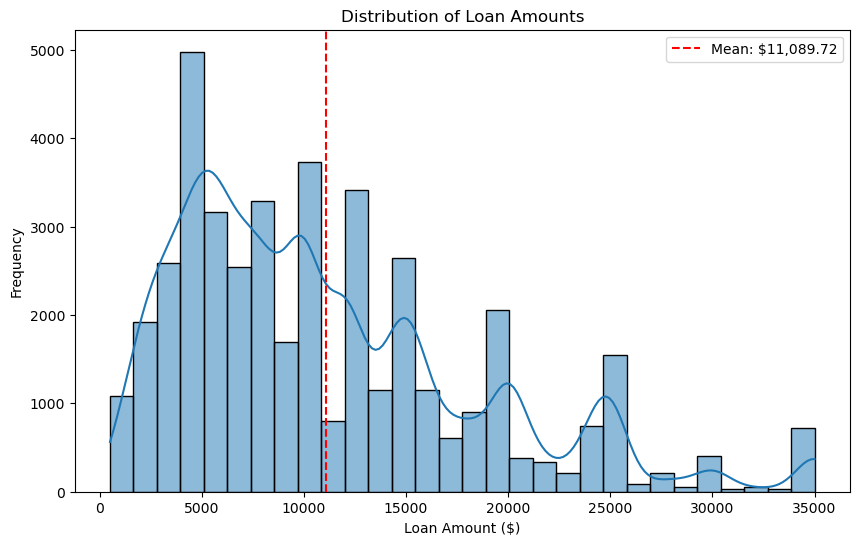


Question 4: What are people taking these loans out for?
Loan purposes and their frequencies:
purpose
debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: count, dtype: int64


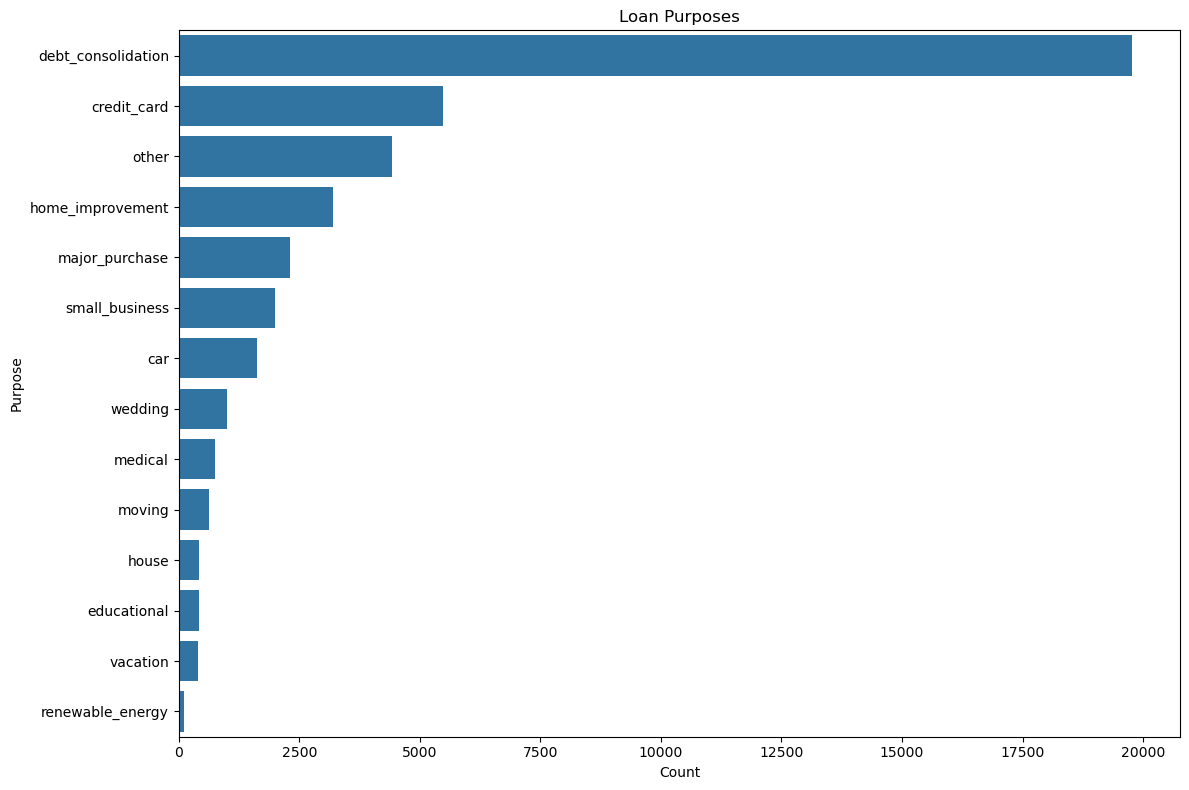


Question 5: Are the borrowers renters or homeowners?
Home ownership statuses and their frequencies:
home_ownership
RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: count, dtype: int64


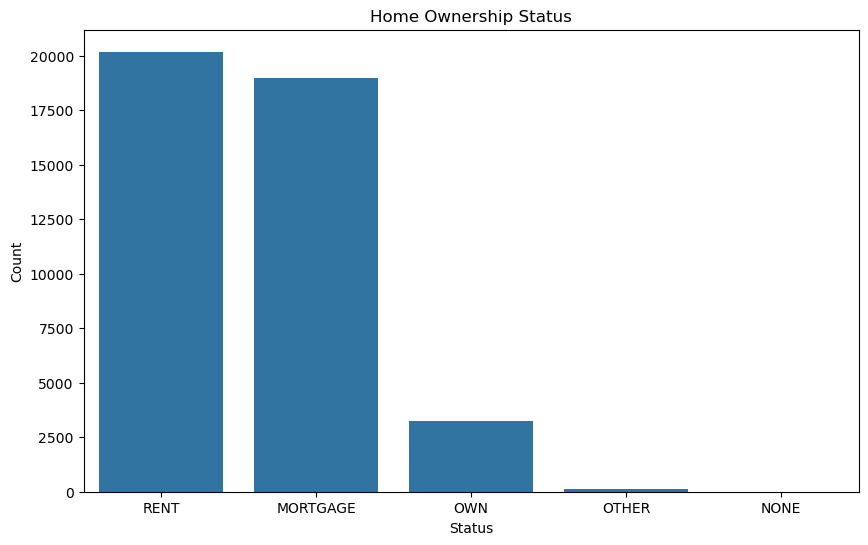


Question 6: Where do these borrowers live?
Number of states represented: 50

States and their frequencies:
addr_state
CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
OH    1329
MD    1125
AZ     933
WA     888
CO     857
NC     830
CT     816
MI     796
MO     765
MN     652
NV     527
WI     516
SC     489
AL     484
OR     468
LA     461
KY     359
OK     317
KS     298
UT     278
AR     261
DC     224
RI     208
NM     205
NH     188
WV     187
HI     181
DE     136
MT      96
WY      87
AK      86
SD      67
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: count, dtype: int64


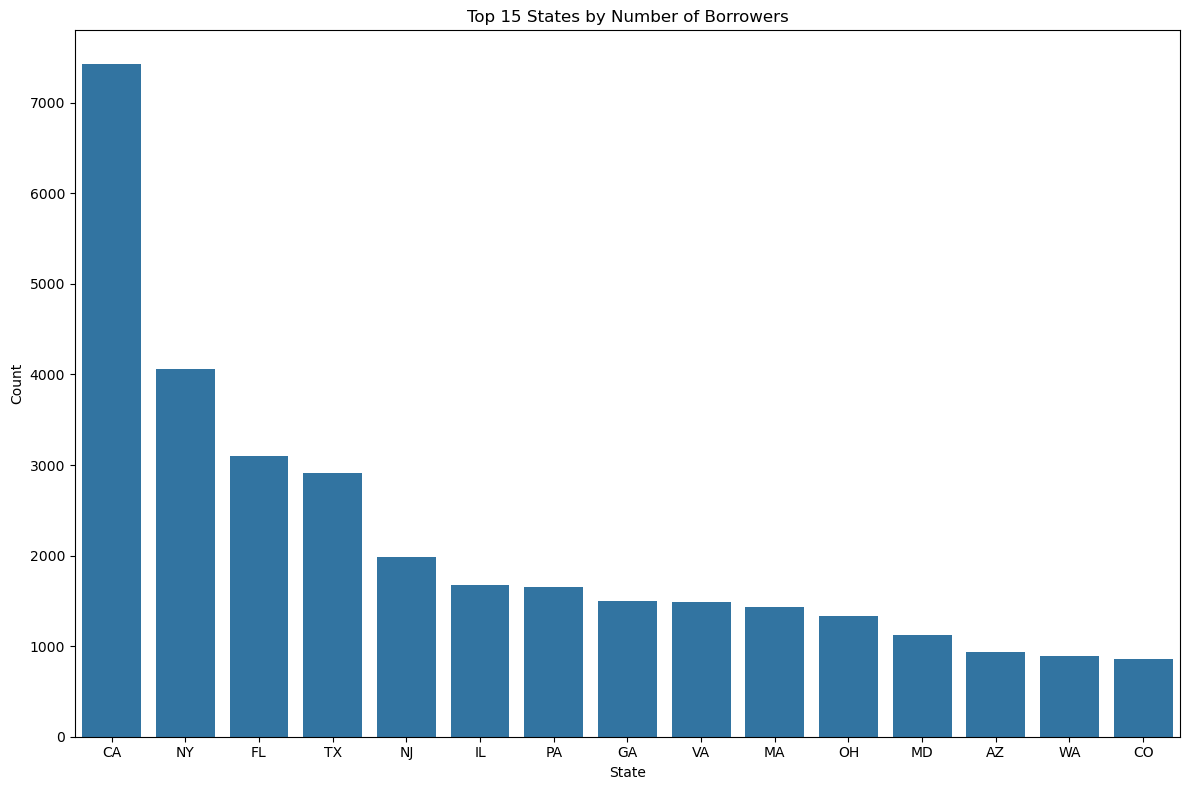


Question 7: Use a predictor and evaluate your model
Unique loan status values:
loan_status
Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: count, dtype: int64

Distribution of successful vs failed loans:
loan_success
1    34116
0     8422
Name: count, dtype: int64
Success rate: 80.20%

Performing feature engineering...
Encoding categorical features...

Features available for modeling:
['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
Total features after engineering: 34
New features added: 25
Handling missing values...
Converting column home_NONE to numeric type...
Converting column home_OTHER to numeric type...
Converting column home_OWN to numeric type...
Converting column home_RENT to numeric type...
Converting column pu

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_8156\3528246697.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_enhanced[col] = pd.to_numeric(X_enhanced[col], errors='coerce')
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_8156\3528246697.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_enhanced[col] = X_enhanced[col].fillna(X_enhanced[col].median() if not X_enhanced[col].isna().all() else 0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_8156\3528246697.py:303: SettingWithCopyWarning: 
A value is t

Converting column purpose_vacation to numeric type...
Converting column purpose_wedding to numeric type...
Converting column state_CA to numeric type...
Converting column state_NY to numeric type...
Converting column state_FL to numeric type...
Converting column state_TX to numeric type...
Converting column state_NJ to numeric type...

Training set size: (29776, 34)
Testing set size: (12762, 34)

Training Random Forest model...

Model Accuracy: 0.8101

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.06      0.11      2527
           1       0.81      1.00      0.89     10235

    accuracy                           0.81     12762
   macro avg       0.80      0.53      0.50     12762
weighted avg       0.81      0.81      0.74     12762


Confusion Matrix:
[[  144  2383]
 [   40 10195]]

Top 15 Feature Importances:
                   Feature  Importance
1                 int_rate    0.151929
6                revol_bal    0.0970

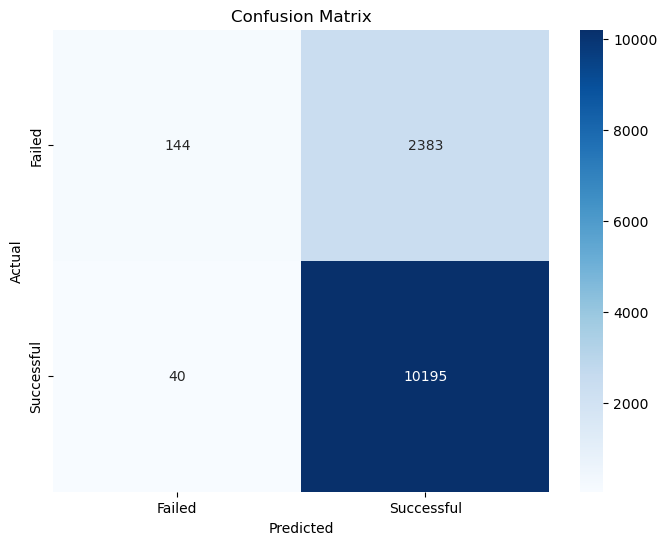

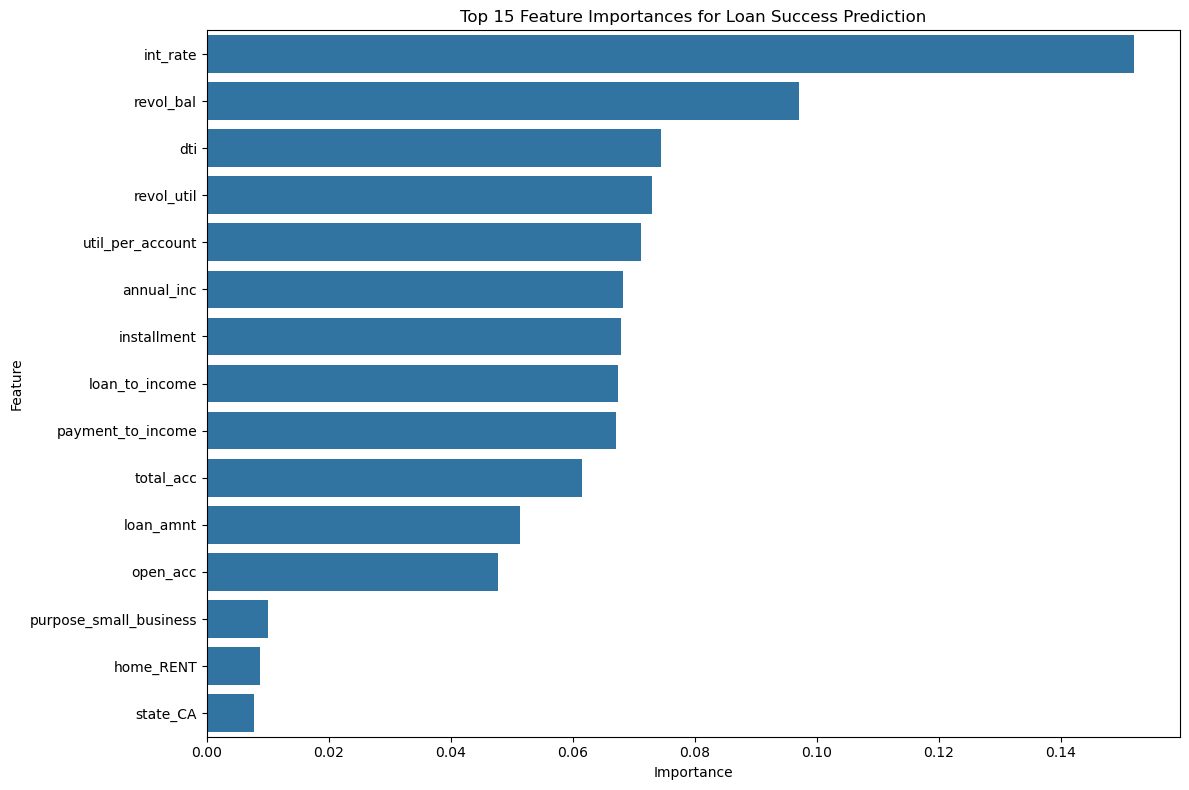


Question 8: Visualize your findings in scatter plots & box plots
Creating visualizations...


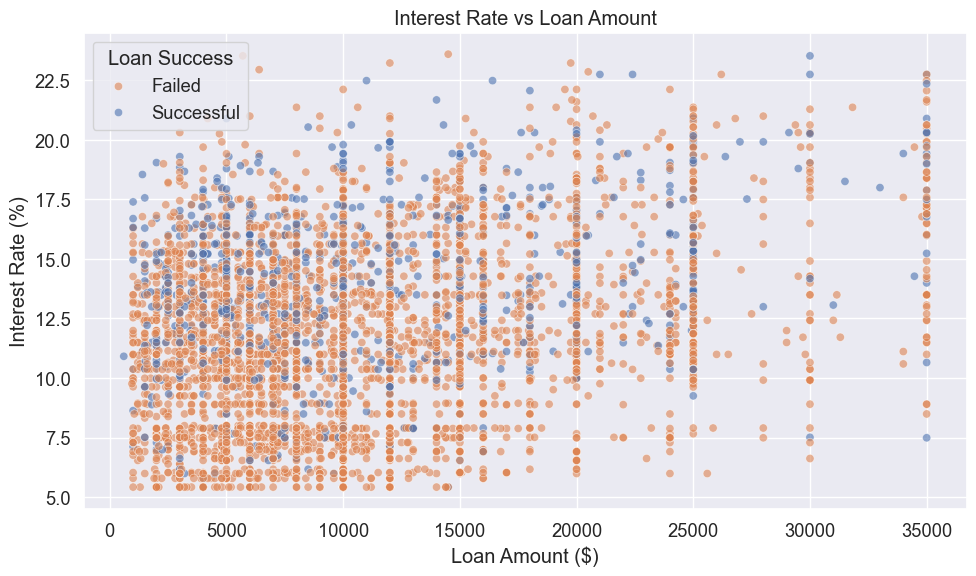

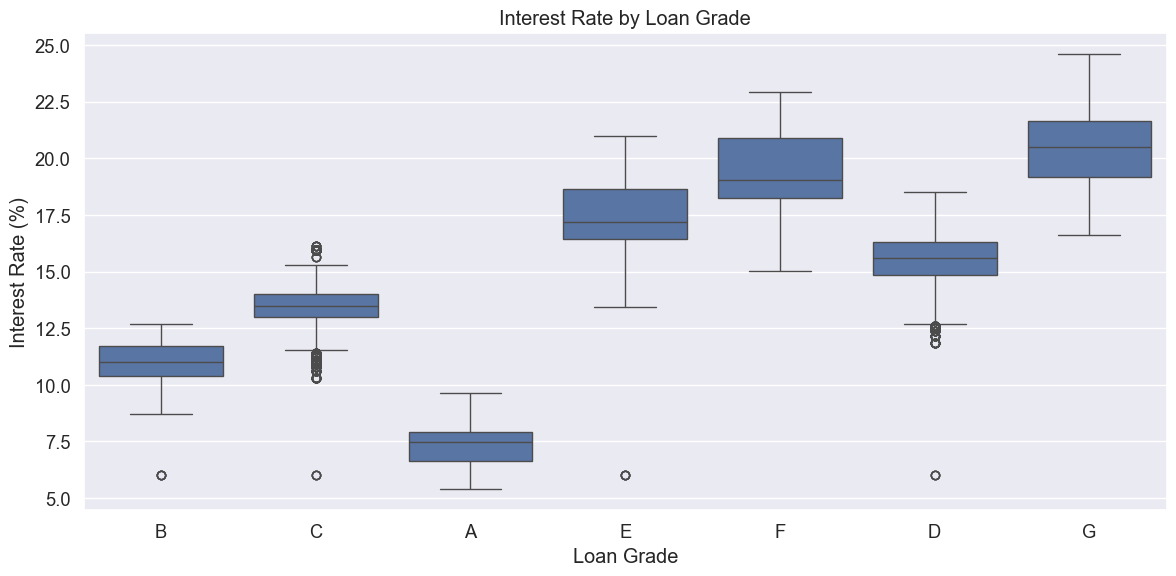

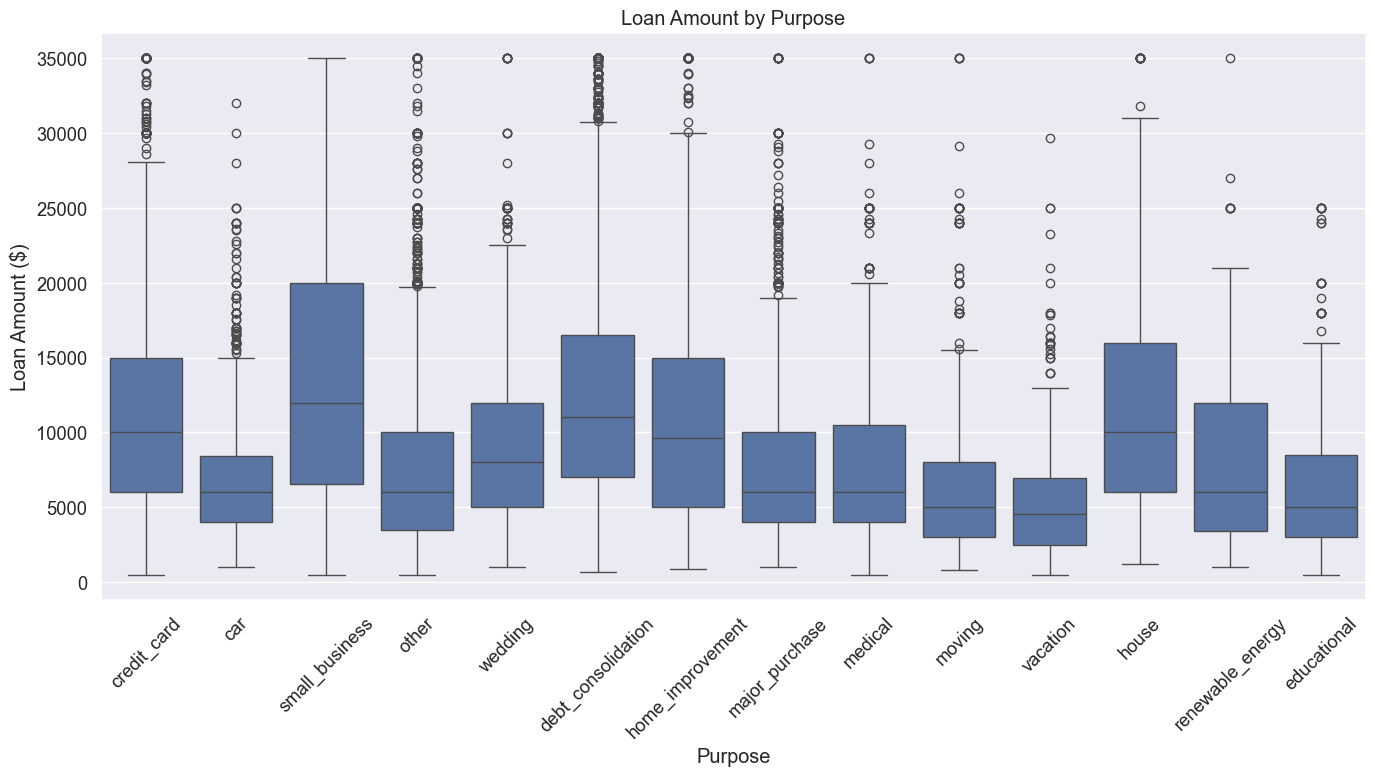

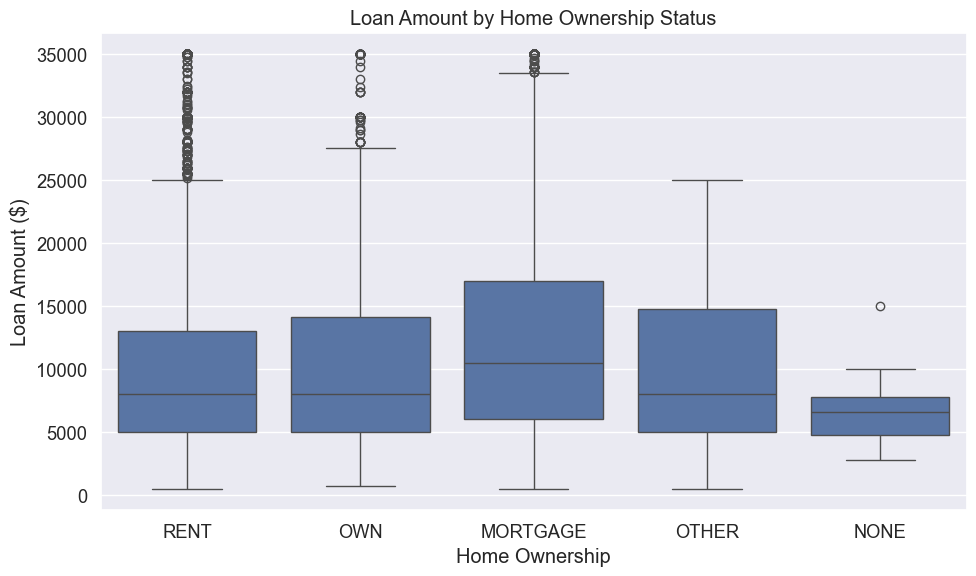

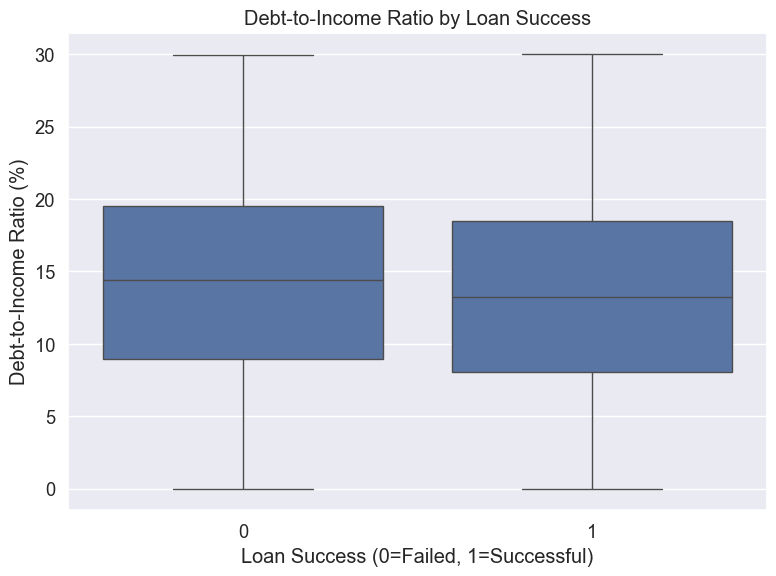


Analysis complete! All questions answered and visualizations created.


In [1]:
# Loan Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load the dataset (skip the first row which contains general information)
print("Loading and exploring the dataset...")
df = pd.read_csv('LoanStats3a.csv', skiprows=1, low_memory=False)
print(f"Dataset shape: {df.shape}")

#------------------------------------------------------------
# Question 1: What kind of interest rate are borrowers paying?
#------------------------------------------------------------
print("\n" + "="*50)
print("Question 1: What kind of interest rate are borrowers paying?")
print("="*50)

# Convert interest rate from string to float
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

# Calculate statistics
min_rate = df['int_rate'].min()
max_rate = df['int_rate'].max()
mean_rate = df['int_rate'].mean()

print(f"Minimum interest rate: {min_rate:.2f}%")
print(f"Maximum interest rate: {max_rate:.2f}%")
print(f"Mean interest rate: {mean_rate:.2f}%")

# Visualize interest rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'].dropna(), kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.axvline(mean_rate, color='r', linestyle='--', label=f'Mean: {mean_rate:.2f}%')
plt.legend()
plt.show()

#------------------------------------------------------------
# Question 2: How long are the loan terms?
#------------------------------------------------------------
print("\n" + "="*50)
print("Question 2: How long are the loan terms?")
print("="*50)

# Clean the term column - handle NaN values before conversion
df['term'] = df['term'].str.strip().str.replace(' months', '')
# Fill NaN values with a placeholder before converting to int
df['term'] = pd.to_numeric(df['term'], errors='coerce').fillna(0).astype('int')

min_term = df['term'].min()
max_term = df['term'].max()
mean_term = df['term'].mean()

print(f"Minimum loan term: {min_term} months")
print(f"Maximum loan term: {max_term} months")
print(f"Mean loan term: {mean_term:.2f} months")

# Visualize term distribution
plt.figure(figsize=(8, 6))
# Only include actual loan terms (exclude 0 values from our fillna)
term_plot_df = df[df['term'] > 0]
sns.countplot(x='term', data=term_plot_df)
plt.title('Distribution of Loan Terms')
plt.xlabel('Term Length (months)')
plt.ylabel('Count')
plt.show()

#------------------------------------------------------------
# Question 3: How much are people borrowing?
#------------------------------------------------------------
print("\n" + "="*50)
print("Question 3: How much are people borrowing?")
print("="*50)

min_amount = df['loan_amnt'].min()
max_amount = df['loan_amnt'].max()
mean_amount = df['loan_amnt'].mean()

print(f"Minimum loan amount: ${min_amount:,.2f}")
print(f"Maximum loan amount: ${max_amount:,.2f}")
print(f"Mean loan amount: ${mean_amount:,.2f}")

# Visualize loan amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'].dropna(), bins=30, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.axvline(mean_amount, color='r', linestyle='--', label=f'Mean: ${mean_amount:,.2f}')
plt.legend()
plt.show()

#------------------------------------------------------------
# Question 4: What are people taking these loans out for?
#------------------------------------------------------------
print("\n" + "="*50)
print("Question 4: What are people taking these loans out for?")
print("="*50)

purpose_counts = df['purpose'].value_counts()
print("Loan purposes and their frequencies:")
print(purpose_counts)

# Visualize loan purposes
plt.figure(figsize=(12, 8))
sns.barplot(x=purpose_counts.values, y=purpose_counts.index)
plt.title('Loan Purposes')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()

#------------------------------------------------------------
# Question 5: Are the borrowers renters or homeowners?
#------------------------------------------------------------
print("\n" + "="*50)
print("Question 5: Are the borrowers renters or homeowners?")
print("="*50)

ownership_counts = df['home_ownership'].value_counts()
print("Home ownership statuses and their frequencies:")
print(ownership_counts)

# Visualize home ownership
plt.figure(figsize=(10, 6))
sns.barplot(x=ownership_counts.index, y=ownership_counts.values)
plt.title('Home Ownership Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

#------------------------------------------------------------
# Question 6: Where do these borrowers live?
#------------------------------------------------------------
print("\n" + "="*50)
print("Question 6: Where do these borrowers live?")
print("="*50)

state_counts = df['addr_state'].value_counts()
print(f"Number of states represented: {len(state_counts)}")
print("\nStates and their frequencies:")
print(state_counts)

# Visualize top 15 states
plt.figure(figsize=(12, 8))
top_15_states = state_counts.head(15)
sns.barplot(x=top_15_states.index, y=top_15_states.values)
plt.title('Top 15 States by Number of Borrowers')
plt.xlabel('State')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#------------------------------------------------------------
# Question 7: Use a predictor and evaluate your model
#------------------------------------------------------------
print("\n" + "="*50)
print("Question 7: Use a predictor and evaluate your model")
print("="*50)

# Check loan status values
print("Unique loan status values:")
print(df['loan_status'].value_counts())

# Create a binary target variable for successful vs failed loans
df['loan_success'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

print("\nDistribution of successful vs failed loans:")
print(df['loan_success'].value_counts())
print(f"Success rate: {df['loan_success'].mean() * 100:.2f}%")

# Feature engineering and model enhancement
# Create a copy of the dataframe for enhanced modeling
enhanced_df = df.copy()

# 1. Feature Engineering
print("\nPerforming feature engineering...")

# Create more informative features
if 'fico_range_low' in enhanced_df.columns and 'fico_range_high' in enhanced_df.columns:
    enhanced_df['avg_fico'] = (enhanced_df['fico_range_low'] + enhanced_df['fico_range_high']) / 2

# Calculate debt-to-income ratio adjusted by FICO score (if available)
if 'dti' in enhanced_df.columns and 'avg_fico' in enhanced_df.columns:
    enhanced_df['dti_fico_ratio'] = enhanced_df['dti'] / enhanced_df['avg_fico']

# Create loan amount to income ratio
if 'loan_amnt' in enhanced_df.columns and 'annual_inc' in enhanced_df.columns:
    enhanced_df['loan_to_income'] = enhanced_df['loan_amnt'] / enhanced_df['annual_inc']

# Interest rate to FICO score ratio (higher ratio may indicate higher risk)
if 'int_rate' in enhanced_df.columns and 'avg_fico' in enhanced_df.columns:
    # Convert int_rate to float if it's a string
    if enhanced_df['int_rate'].dtype == 'object':
        enhanced_df['int_rate'] = enhanced_df['int_rate'].str.rstrip('%').astype('float')
    enhanced_df['int_rate_to_fico'] = enhanced_df['int_rate'] / enhanced_df['avg_fico']

# Add payment to income ratio
if 'installment' in enhanced_df.columns and 'annual_inc' in enhanced_df.columns:
    enhanced_df['payment_to_income'] = (enhanced_df['installment'] * 12) / enhanced_df['annual_inc']

# Utilization relative to total accounts
if 'revol_util' in enhanced_df.columns and 'total_acc' in enhanced_df.columns:
    # Handle percentage format if needed
    if enhanced_df['revol_util'].dtype == 'object':
        enhanced_df['revol_util'] = enhanced_df['revol_util'].str.rstrip('%').astype('float')
    enhanced_df['util_per_account'] = enhanced_df['revol_util'] / enhanced_df['total_acc']

# 2. Include categorical features with encoding
print("Encoding categorical features...")

# FIRST convert categorical columns to categorical type explicitly
if 'home_ownership' in enhanced_df.columns:
    enhanced_df['home_ownership'] = enhanced_df['home_ownership'].astype('category')

if 'purpose' in enhanced_df.columns:
    enhanced_df['purpose'] = enhanced_df['purpose'].astype('category')

if 'addr_state' in enhanced_df.columns:
    enhanced_df['addr_state'] = enhanced_df['addr_state'].astype('category')

# One-hot encode home ownership
if 'home_ownership' in enhanced_df.columns:
    home_dummies = pd.get_dummies(enhanced_df['home_ownership'], prefix='home', drop_first=True)
    enhanced_df = pd.concat([enhanced_df, home_dummies], axis=1)
    # Drop the original column to avoid confusion during scaling
    enhanced_df = enhanced_df.drop('home_ownership', axis=1)

# One-hot encode purpose
if 'purpose' in enhanced_df.columns:
    purpose_dummies = pd.get_dummies(enhanced_df['purpose'], prefix='purpose', drop_first=True)
    enhanced_df = pd.concat([enhanced_df, purpose_dummies], axis=1)
    # Drop the original column
    enhanced_df = enhanced_df.drop('purpose', axis=1)

# Optional: Add state information if there are strong geographic patterns
if 'addr_state' in enhanced_df.columns:
    # Add top N states as dummies to avoid too many features
    top_states = enhanced_df['addr_state'].value_counts().head(5).index
    for state in top_states:
        enhanced_df[f'state_{state}'] = (enhanced_df['addr_state'] == state).astype(int)
    # Drop the original column
    enhanced_df = enhanced_df.drop('addr_state', axis=1)

# Select features that actually exist in the dataframe
all_possible_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
                     'fico_range_low', 'fico_range_high', 'open_acc', 'revol_bal', 
                     'revol_util', 'total_acc']

# Check which features exist in the dataframe
numerical_features = [col for col in all_possible_features if col in df.columns]
print("\nFeatures available for modeling:")
print(numerical_features)

# Define original numerical features
original_numerical_features = [col for col in numerical_features if col in enhanced_df.columns]

# Get engineered feature columns
engineered_features = ['avg_fico', 'dti_fico_ratio', 'loan_to_income', 
                       'int_rate_to_fico', 'payment_to_income', 'util_per_account']
engineered_features = [f for f in engineered_features if f in enhanced_df.columns]

# Get encoded categorical columns - find all dummy columns
categorical_features = [col for col in enhanced_df.columns if 
                        col.startswith('home_') or 
                        col.startswith('purpose_') or 
                        col.startswith('state_')]

# Combine all features
all_features = original_numerical_features + engineered_features + categorical_features
print(f"Total features after engineering: {len(all_features)}")
print(f"New features added: {len(engineered_features) + len(categorical_features)}")

# Handle missing values
print("Handling missing values...")
for col in all_features:
    # Fill numeric with median, categorical with 0
    if enhanced_df[col].dtype in ['int64', 'float64']:
        enhanced_df[col] = enhanced_df[col].fillna(enhanced_df[col].median())
    else:
        enhanced_df[col] = enhanced_df[col].fillna(0)

# Prepare train/test data
X_enhanced = enhanced_df[all_features]
y_enhanced = enhanced_df['loan_success']

# Verify that X_enhanced contains only numeric data
for col in X_enhanced.columns:
    if X_enhanced[col].dtype not in ['int64', 'float64']:
        print(f"Converting column {col} to numeric type...")
        X_enhanced[col] = pd.to_numeric(X_enhanced[col], errors='coerce')
        # Fill any NaN values created by the conversion
        X_enhanced[col] = X_enhanced[col].fillna(X_enhanced[col].median() if not X_enhanced[col].isna().all() else 0)

# Use stratified sampling to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y_enhanced, test_size=0.3, random_state=42, stratify=y_enhanced
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Scale numerical features
scaler = StandardScaler()
# Only scale numerical features that exist in the dataframe
numerical_cols = [col for col in all_features if enhanced_df[col].dtype in ['int64', 'float64']]
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Train Random Forest model
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_enhanced.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Feature Importances:")
print(feature_importance.head(15))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Failed', 'Successful'], 
            yticklabels=['Failed', 'Successful'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances for Loan Success Prediction')
plt.tight_layout()
plt.show()

#------------------------------------------------------------
# Question 8: Visualize your findings in scatter plots & box plots
#------------------------------------------------------------
print("\n" + "="*50)
print("Question 8: Visualize your findings in scatter plots & box plots")
print("="*50)

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

print("Creating visualizations...")

# 1. Interest rate vs Loan Amount (Scatter plot)
plt.figure(figsize=(10, 6))
# Convert int_rate to numeric if it's not already
if df['int_rate'].dtype == 'object':
    df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')
# Sample data and drop NA values before plotting
sample_df = df.sample(min(5000, len(df))).dropna(subset=['loan_amnt', 'int_rate', 'loan_success'])
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_success', data=sample_df, alpha=0.6)
plt.title('Interest Rate vs Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Success', labels=['Failed', 'Successful'])
plt.tight_layout()
plt.show()

# 2. FICO score vs interest rate (Scatter plot)
if 'fico_range_low' in df.columns and 'fico_range_high' in df.columns:
    plt.figure(figsize=(10, 6))
    df['avg_fico'] = (df['fico_range_low'] + df['fico_range_high']) / 2
    # Make sure int_rate is numeric
    if df['int_rate'].dtype == 'object':
        df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')
    sample_df = df.sample(min(5000, len(df))).dropna(subset=['avg_fico', 'int_rate', 'loan_success'])
    sns.scatterplot(x='avg_fico', y='int_rate', hue='loan_success', data=sample_df, alpha=0.6)
    plt.title('Interest Rate vs Average FICO Score')
    plt.xlabel('Average FICO Score')
    plt.ylabel('Interest Rate (%)')
    plt.legend(title='Loan Success', labels=['Failed', 'Successful'])
    plt.tight_layout()
    plt.show()

# 3. Interest Rate by Loan Grade (Box plot)
if 'grade' in df.columns:
    plt.figure(figsize=(12, 6))
    # Make sure int_rate is numeric
    if df['int_rate'].dtype == 'object':
        df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')
    grade_df = df.dropna(subset=['grade', 'int_rate'])
    sns.boxplot(x='grade', y='int_rate', data=grade_df)
    plt.title('Interest Rate by Loan Grade')
    plt.xlabel('Loan Grade')
    plt.ylabel('Interest Rate (%)')
    plt.tight_layout()
    plt.show()

# 4. Loan Amount by Purpose (Box plot)
plt.figure(figsize=(14, 8))
purpose_df = df.dropna(subset=['purpose', 'loan_amnt'])
sns.boxplot(x='purpose', y='loan_amnt', data=purpose_df)
plt.title('Loan Amount by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Loan amount by home ownership (Box plot)
plt.figure(figsize=(10, 6))
ownership_df = df.dropna(subset=['home_ownership', 'loan_amnt'])
sns.boxplot(x='home_ownership', y='loan_amnt', data=ownership_df)
plt.title('Loan Amount by Home Ownership Status')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount ($)')
plt.tight_layout()
plt.show()

# 6. DTI by loan success (Box plot)
if 'dti' in df.columns:
    plt.figure(figsize=(8, 6))
    dti_df = df.dropna(subset=['dti', 'loan_success'])
    sns.boxplot(x='loan_success', y='dti', data=dti_df)
    plt.title('Debt-to-Income Ratio by Loan Success')
    plt.xlabel('Loan Success (0=Failed, 1=Successful)')
    plt.ylabel('Debt-to-Income Ratio (%)')
    plt.tight_layout()
    plt.show()

print("\nAnalysis complete! All questions answered and visualizations created.")